# Leer el Dataset homes.csv

In [211]:
#Importando las librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [212]:
#Impoprtando el dataset
missing_values = ["n/a", "na", "--"]
dataset = pd.read_csv('wines.csv',na_values = missing_values)

# Explorar los datos para obtener ideas.

In [213]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [214]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [215]:
dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [216]:
dataset.shape

(1599, 12)

In [217]:
dataset["sulphates"].value_counts()

0.60    69
0.58    68
0.54    68
0.62    61
0.56    60
        ..
1.00     1
1.59     1
0.33     1
1.26     1
1.01     1
Name: sulphates, Length: 96, dtype: int64

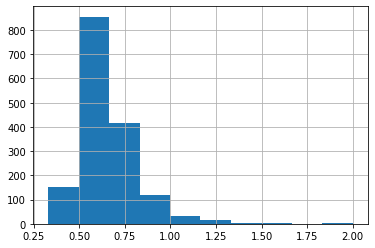

In [218]:
dataset["sulphates"].hist()

In [219]:
dataset["sulphates_cat"]= pd.cut(dataset["sulphates"],
                               bins=[0.25, 0.50, 0.75, 1.00, 1.25, 1.50,1.75, 2.00,np.inf],
                               labels=[1, 2, 3,4, 5, 6,7, 8])
dataset["sulphates_cat"].value_counts()

2    1081
3     282
1     178
4      41
5       9
6       4
7       4
8       0
Name: sulphates_cat, dtype: int64

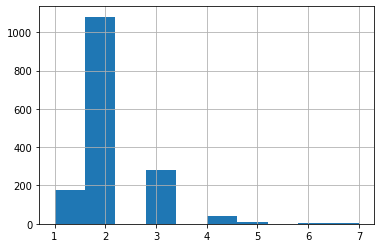

In [220]:
dataset["sulphates_cat"].hist()

# Preparar los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático.

In [221]:
#Variables independientes
X = dataset.drop("fixed acidity", axis=1)
#Variables dependientes
y =  dataset["fixed acidity"]

# Generar el conjunto de prueba.

In [222]:
#Splitting the data set into the training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2,random_state=1)

In [223]:
X_train

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sulphates_cat
701,0.650,0.02,2.1,0.066,8.0,25.0,0.99720,3.47,0.67,9.5,6,2
56,0.420,0.57,3.4,0.070,4.0,10.0,0.99710,3.04,0.63,9.6,5,2
142,0.340,0.00,1.8,0.050,27.0,63.0,0.99160,3.68,0.79,14.0,6,3
863,0.620,0.06,2.5,0.078,17.0,84.0,0.99746,3.51,0.53,9.7,5,2
1387,0.640,0.07,1.8,0.100,8.0,23.0,0.99610,3.30,0.58,9.6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...
715,0.490,0.18,2.7,0.069,13.0,34.0,0.99670,3.29,0.48,9.2,6,1
905,0.580,0.20,3.0,0.081,15.0,115.0,0.99800,3.23,0.59,9.5,5,2
1096,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8,6,1
235,0.630,0.00,1.9,0.097,14.0,38.0,0.99675,3.37,0.58,9.0,6,2


In [224]:
X_test

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,sulphates_cat
75,0.41,0.64,2.2,0.093,9.0,42.0,0.99860,3.54,0.66,10.5,5,2
1283,0.63,0.28,2.7,0.096,17.0,69.0,0.99734,3.26,0.63,10.2,6,2
408,0.34,0.58,3.7,0.174,6.0,16.0,0.99700,3.19,0.70,11.3,6,2
1281,0.46,0.20,1.9,0.077,28.0,54.0,0.99560,3.37,0.64,10.4,6,2
1118,0.39,0.12,2.1,0.065,14.0,24.0,0.99252,3.30,0.53,13.3,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...
890,0.34,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,5,2
146,0.68,0.02,1.8,0.087,21.0,94.0,0.99440,3.54,0.52,10.0,5,2
1551,0.67,0.00,2.3,0.083,18.0,27.0,0.99768,3.44,0.54,9.4,5,2
1209,0.39,0.43,2.0,0.071,14.0,24.0,0.99428,3.45,0.87,11.2,7,3


In [225]:
y_train

701      7.0
56      10.2
142      5.2
863      7.2
1387     7.4
        ... 
715      7.2
905      9.2
1096     6.6
235      7.2
1061     9.1
Name: fixed acidity, Length: 1279, dtype: float64

In [226]:
y_test

75       8.8
1283     8.7
408     10.4
1281     7.1
1118     7.1
        ... 
890      7.2
146      5.8
1551     7.1
1209     6.2
1220    10.9
Name: fixed acidity, Length: 320, dtype: float64

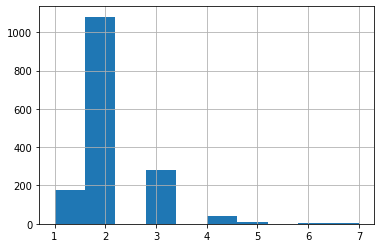

In [227]:
dataset['sulphates_cat'].hist()

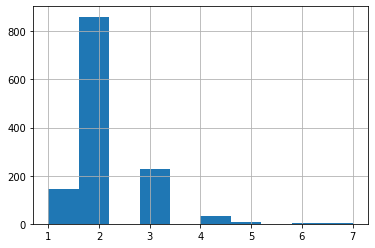

In [228]:
X_train["sulphates_cat"].hist()

In [229]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(dataset, dataset["sulphates_cat"]):
    strat_train_set = dataset.loc[train_index]
    strat_test_set = dataset.loc[test_index]

In [230]:
strat_test_set["sulphates_cat"].value_counts() / len(strat_test_set)

2    0.675000
3    0.175000
1    0.112500
4    0.025000
5    0.006250
6    0.003125
7    0.003125
8    0.000000
Name: sulphates_cat, dtype: float64

In [231]:
dataset["sulphates_cat"].value_counts() / len(dataset)

2    0.676048
3    0.176360
1    0.111320
4    0.025641
5    0.005629
6    0.002502
7    0.002502
8    0.000000
Name: sulphates_cat, dtype: float64

In [232]:
def sulphates_cat_proportions(data):
    return data["sulphates_cat"].value_counts() / len(data)

train_set, test_set = train_test_split(dataset, test_size=0.2, random_state=42)

compare_props = pd.DataFrame({
    "Overall": sulphates_cat_proportions(dataset),
    "Stratified": sulphates_cat_proportions(strat_test_set),
    "Random": sulphates_cat_proportions(test_set),
}).sort_index()
compare_props["Rand. %error"] = 100 * compare_props["Random"] / compare_props["Overall"] - 100
compare_props["Strat. %error"] = 100 * compare_props["Stratified"] / compare_props["Overall"] - 100

In [233]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("sulphates_cat", axis=1, inplace=True)

# Visualización de los datos

In [234]:
dataset = strat_train_set.copy()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff014825410>,
      dtype=object)

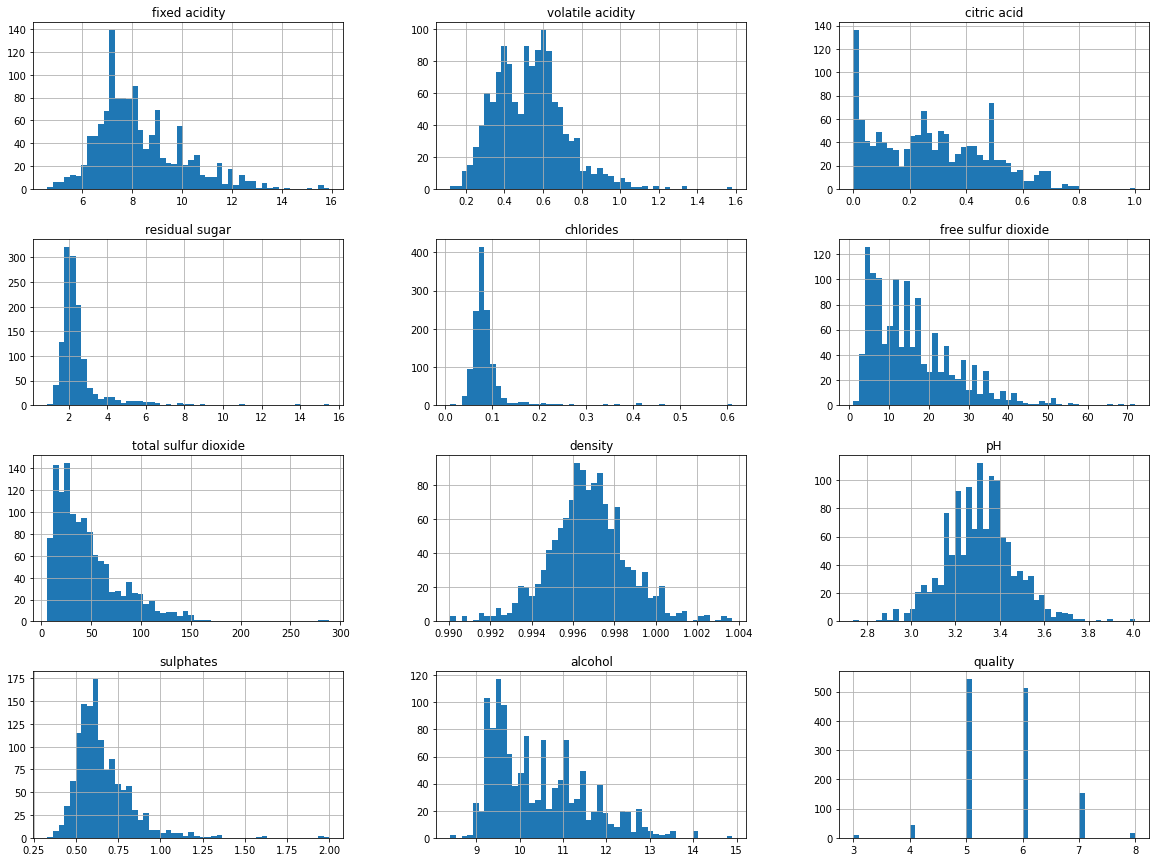

In [235]:
dataset.hist(bins=50, figsize=(20,15))

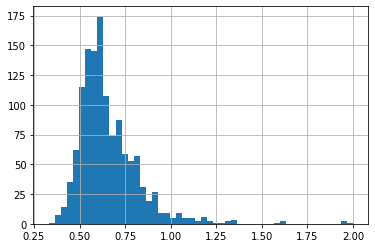

In [236]:
dataset['sulphates'].hist(bins=50)

In [237]:
#matriz de correlacion
corr_matrix = dataset.corr()
corr_matrix["fixed acidity"].sort_values(ascending=False)

fixed acidity           1.000000
density                 0.665693
citric acid             0.662133
sulphates               0.174212
residual sugar          0.140414
quality                 0.104911
chlorides               0.092277
alcohol                -0.050561
total sulfur dioxide   -0.116902
free sulfur dioxide    -0.158754
volatile acidity       -0.240691
pH                     -0.679039
Name: fixed acidity, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff013b3b290>,
      dtype=object)

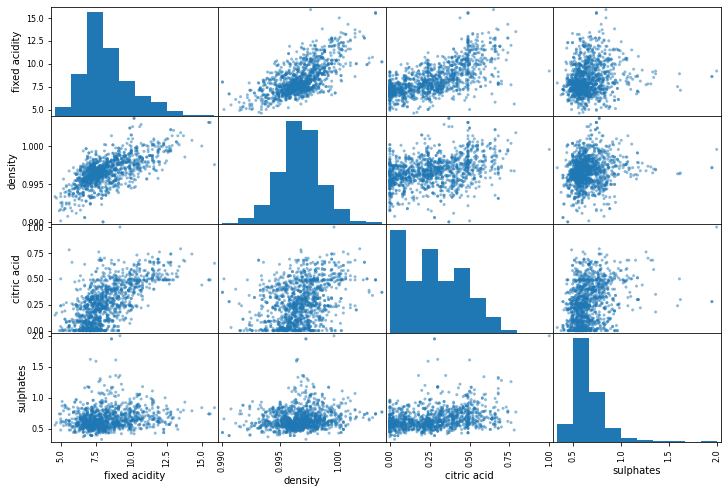

In [238]:
from pandas.plotting import scatter_matrix

attributes = ["fixed acidity","density", "citric acid", "sulphates"]
scatter_matrix(dataset[attributes], figsize=(12, 8))

# Preparar los datos para exponer mejor los patrones de datos subyacentes a los algoritmos de aprendizaje automático.



In [239]:
dataset_copy = dataset.drop("fixed acidity", axis=1)
dataset_labels =  strat_train_set["fixed acidity"].copy()

In [240]:
incomplete_rows = dataset_copy[dataset_copy.isnull().any(axis=1)].head()
incomplete_rows

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [241]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [242]:
homes_num = dataset_copy.select_dtypes(include=[np.number])
imputer.fit(homes_num)

SimpleImputer(strategy='median')

In [243]:
imputer.statistics_

array([ 0.52   ,  0.25   ,  2.2    ,  0.08   , 14.     , 38.     ,
        0.99675,  3.31   ,  0.62   , 10.2    ,  6.     ])

In [244]:
homes_num.median().values

array([ 0.52   ,  0.25   ,  2.2    ,  0.08   , 14.     , 38.     ,
        0.99675,  3.31   ,  0.62   , 10.2    ,  6.     ])

In [245]:
X = imputer.transform(homes_num)

In [246]:
homes_tr = pd.DataFrame(X, columns=homes_num.columns,
                          index=dataset_copy.index)

In [247]:
homes_tr.loc[incomplete_rows.index.values]

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality


In [248]:
imputer.strategy

'median'

In [249]:
homes_tr = pd.DataFrame(X, columns=homes_num.columns,
                          index=homes_num.index)
homes_tr.head()

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
956,0.360,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6.0
1553,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4,5.0
567,0.700,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,6.0
1541,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,7.0
1578,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6.0


In [250]:
dataset

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
956,9.0,0.360,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6
1553,7.3,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4,5
567,8.7,0.700,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,6
1541,7.4,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,7
1578,6.8,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6
...,...,...,...,...,...,...,...,...,...,...,...,...
1491,5.6,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5
641,9.5,0.590,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5
1157,5.1,0.510,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,7
26,7.6,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5,5


In [251]:
def feature_engineering(data):
    data["citric_acid_per_density"]=data["citric acid"]/data["density"]
    data["ph_per_density"]=data["pH"]/data["density"]
    return data

In [252]:
homes_feature_engineered = feature_engineering(dataset_copy)
homes_feature_engineered

,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,citric_acid_per_density,ph_per_density
956,0.360,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6,0.522256,3.324361
1553,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4,5,0.000000,3.418032
567,0.700,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,6,0.240216,3.322991
1541,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,7,0.290972,3.411394
1578,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6,0.150693,3.435805
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1491,0.540,0.04,1.7,0.049,5.0,13.0,0.99420,3.72,0.58,11.4,5,0.040233,3.741702
641,0.590,0.44,2.3,0.071,21.0,68.0,0.99920,3.46,0.63,9.5,5,0.440352,3.462770
1157,0.510,0.18,2.1,0.042,16.0,101.0,0.99240,3.46,0.87,12.9,7,0.181378,3.486497
26,0.410,0.24,1.8,0.080,4.0,11.0,0.99620,3.28,0.59,9.5,5,0.240915,3.292512


In [253]:
from sklearn.base import BaseEstimator, TransformerMixin

col_names = "citric acid", "density", "pH"
citric_acid_ix, density_ix, pH_ix = [dataset.columns.get_loc(c) for c in col_names]

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_citric_acid_per_density=True):
        self.add_citric_acid_per_density = add_citric_acid_per_density
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        ph_per_density = X[:, density_ix] / X[:, pH_ix]
        if self.add_citric_acid_per_density:
            citric_acid_per_density = X[:, citric_acid_ix] / X[:, pH_ix]
            return np.c_[X, ph_per_density, citric_acid_per_density]
        else:
            return np.c_[X, ph_per_density]

attr_adder = CombinedAttributesAdder(add_citric_acid_per_density=False)
homes_extra_attribs = attr_adder.transform(dataset.values)

homes_extra_attribs = pd.DataFrame(
    homes_extra_attribs,
    columns=list(dataset.columns)+["ph_per_density"],
    index=dataset.index)
homes_extra_attribs.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,ph_per_density
956,9.0,0.360,0.52,2.1,0.111,5.0,10.0,0.99568,3.31,0.62,11.3,6.0,0.300810
1553,7.3,0.735,0.00,2.2,0.080,18.0,28.0,0.99765,3.41,0.60,9.4,5.0,0.292566
567,8.7,0.700,0.24,2.5,0.226,5.0,15.0,0.99910,3.32,0.60,9.0,6.0,0.300934
1541,7.4,0.250,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.9,7.0,0.293135
1578,6.8,0.670,0.15,1.8,0.118,13.0,20.0,0.99540,3.42,0.67,11.3,6.0,0.291053


In [254]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

homes_num_tr = num_pipeline.fit_transform(homes_num)
homes_num_tr

array([[-0.95082592,  1.28645207, -0.30832729, ...,  0.45915502,
         0.03927435, -0.27336126],
       [ 1.12264813, -1.38828078, -0.23916117, ..., -0.76942085,
         0.34262264, -0.15843863],
       [ 0.92912388, -0.15378869, -0.03166283, ...,  0.45915502,
         0.21058805,  0.04709605],
       ...,
       [-0.1214363 , -0.46241171, -0.30832729, ...,  1.68773089,
        -1.15933406, -0.67345659],
       [-0.67436271, -0.15378869, -0.51582563, ..., -0.76942085,
         0.2334641 , -0.41158305],
       [-0.95082592,  0.97782905, -0.30832729, ...,  1.68773089,
        -1.13909887, -0.65010985]])

In [255]:
from sklearn.compose import ColumnTransformer

num_attribs = list(homes_num)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
])

homes_prepared = full_pipeline.fit_transform(dataset_copy)
homes_prepared

array([[-0.95082592,  1.28645207, -0.30832729, ...,  0.45915502,
         0.03927435, -0.27336126],
       [ 1.12264813, -1.38828078, -0.23916117, ..., -0.76942085,
         0.34262264, -0.15843863],
       [ 0.92912388, -0.15378869, -0.03166283, ...,  0.45915502,
         0.21058805,  0.04709605],
       ...,
       [-0.1214363 , -0.46241171, -0.30832729, ...,  1.68773089,
        -1.15933406, -0.67345659],
       [-0.67436271, -0.15378869, -0.51582563, ..., -0.76942085,
         0.2334641 , -0.41158305],
       [-0.95082592,  0.97782905, -0.30832729, ...,  1.68773089,
        -1.13909887, -0.65010985]])

In [256]:
homes_prepared.shape

(1279, 13)

# Explorar muchos modelos diferentes y preseleccionar los mejores.[texto del enlace

###Regresion lineal

In [257]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()

In [258]:
model_lin_reg = Pipeline([
    ("full_pipeline", full_pipeline),
    ("lin_reg", LinearRegression())
])
model_lin_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                     

In [259]:
#preguntar el porque va el :5
some_data = X_test.iloc[:5]

print("Predicción (Regresión Linear):", model_lin_reg.predict(some_data))

Predicción (Regresión Linear): [9.09260851 8.72931547 9.60201684 7.38150678 7.22498227]


### Validación cruzada (Regresión Lineal)

In [260]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [261]:
from sklearn.model_selection import cross_val_score

lin_scores = cross_val_score(model_lin_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

display_scores(lin_rmse_scores)

Scores: [0.75308434 0.72008598 0.57411802 0.51902567 0.65685673 0.66235984
 0.45550914 0.74285315 0.60584457 0.5658839 ]
Mean: 0.625562134748739
Standard deviation: 0.0938893425586231


### Decision Tree Regressor

In [262]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(random_state=42)

In [263]:
model_tree_reg = Pipeline([
    ("full_pipeline", full_pipeline),
    ("tree_reg", tree_reg)
])
model_tree_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                     

In [264]:
print("Predicción (Desicion Tree):", model_tree_reg.predict(some_data))

Predicción (Desicion Tree): [8.8 8.4 7.8 7.1 5.9]


In [265]:
list(y_test.iloc[:5])

[8.8, 8.7, 10.4, 7.1, 7.1]

### Validación cruzada (Desicion Tree)

In [266]:
tree_scores = cross_val_score(model_tree_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-tree_scores)

display_scores(tree_rmse_scores)

Scores: [1.0060753  1.35899779 1.047318   1.07339997 1.08584644 0.8665665
 0.81182664 1.09928954 0.8461309  1.00015624]
Mean: 1.0195607333051684
Standard deviation: 0.150610129480812


### Random Forest Regressor

In [267]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor(n_estimators=10, random_state=42)

In [268]:
model_forest_reg = Pipeline([
    ("full_pipeline", full_pipeline),
    ("forest_reg", forest_reg)
])
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                     

In [269]:
print("Predicción (Random Forest):", model_forest_reg.predict(some_data))

Predicción (Random Forest): [8.83 8.24 9.96 7.16 7.2 ]


In [270]:
list(y_test.iloc[:5])

[8.8, 8.7, 10.4, 7.1, 7.1]

### Validación cruzada (Random Forest)

In [271]:
forest_scores = cross_val_score(model_forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [0.83837641 0.85771499 0.75894664 0.73907036 0.71378393 0.5778381
 0.8810842  1.10575059 0.80880892 0.58464198]
Mean: 0.786601613644992
Standard deviation: 0.1455026680549015


# Afinar los modelos.

### Grid Search

In [272]:
from sklearn.model_selection import GridSearchCV

n_estimators = [3, 10, 30]
max_features = [2, 4, 6, 8]
bootstrap = [False]
min_samples_split = [3, 10]
max_depth = [2, 3, 4]

param_grid = [
  {
    'forest_reg__n_estimators': n_estimators,
    'forest_reg__max_features': max_features
  },
  {
    'forest_reg__bootstrap': bootstrap,
    'forest_reg__min_samples_split': min_samples_split,
    'forest_reg__max_depth': max_depth
  }
]

grid_search = GridSearchCV(model_forest_reg, param_grid=param_grid, cv=10, scoring="neg_mean_squared_error", n_jobs=1, verbose=2)

In [273]:
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 18 candidates, totalling 180 fits
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=3; total time=   0.0s
[CV] END forest_reg__max_features=2, forest_reg__n_estimators=10; total time=   0.0s
[CV] END for

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('full_pipeline',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('attribs_adder',
                                                                                          CombinedAttributesAdder()),
                                                                                         ('std_scaler',
                                                                                          StandardScaler())]),
                                                                         ['volatile '
                                                                          'acidity',
      

In [274]:
grid_search.best_params_

{'forest_reg__max_features': 6, 'forest_reg__n_estimators': 30}

In [275]:
forest_reg = RandomForestRegressor(random_state=42, max_features=6, n_estimators=30)

In [276]:
model_forest_reg = Pipeline({
    ("full_pipeline", full_pipeline),
    ("forest_reg", forest_reg)
})
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                     

###Validación cruzada

In [277]:
forest_scores = cross_val_score(model_forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [0.7745561  0.69469218 0.7166468  0.71881823 0.6603353  0.69801405
 0.75795183 1.02881894 0.80204664 0.56013515]
Mean: 0.7412015221387773
Standard deviation: 0.11501113217251653


### Randomized Search

In [278]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
    'forest_reg__n_estimators': randint(low=1, high=200),
    'forest_reg__max_features': randint(low=1, high=6),
}

rnd_search = RandomizedSearchCV(estimator=model_forest_reg, param_distributions=param_distribs, n_iter=5, cv=10, 
                                scoring="neg_mean_squared_error", n_jobs=-1, verbose=10)

In [279]:
rnd_search.fit(X_train, y_train)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('full_pipeline',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('attribs_adder',
                                                                                                CombinedAttributesAdder()),
                                                                                               ('std_scaler',
                                                                                                StandardScaler())]),
                                                                               ['volatile '
                               

In [280]:
rnd_search.best_params_

{'forest_reg__max_features': 3, 'forest_reg__n_estimators': 138}

In [281]:
forest_reg = RandomForestRegressor(random_state=42, max_features=5, n_estimators=29)

In [282]:
model_forest_reg = Pipeline({
    ("full_pipeline", full_pipeline),
    ("forest_reg", forest_reg)
})
model_forest_reg.fit(X_train, y_train)

Pipeline(steps=[('full_pipeline',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['volatile acidity',
                                                   'citric acid',
                                                   'residual sugar',
                                                   'chlorides',
                                                   'free sulfur dioxide',
                                     

###Validación cruzada

In [283]:
forest_scores = cross_val_score(model_forest_reg, X_test, y_test, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

Scores: [0.8168912  0.69626173 0.72197568 0.75632514 0.69433327 0.63689542
 0.69958689 1.0804806  0.88201599 0.57406415]
Mean: 0.7558830074200054
Standard deviation: 0.13559995969729147
